# 04_ols_models

Xolani Sibande (April 2025)

Importing packages:

In [ ]:
library(here)

here() starts at /Users/xolanisibande-dev/Papers/US_EM_MPS_spillover

Importing functions:

In [ ]:
source(here("notebooks", "functions", "fx_plot.R"))
source(here("notebooks", "functions", "group_ols_funcs.R"))

Importing data:

In [ ]:
announcement_days_tbl <- 
  read_rds(here("notebooks", "outputs", "artifacts_announcement_days_data.rds")) |> 
  pluck(1)

Running models:

In [ ]:
# South Africa
vars <- c("FFR", "FG", "LSAP", "SA_diff")
formula <- formula(value ~ SA_diff)

sa_ols_models_tbl <- 
  announcement_days_tbl |> 
  ols_model(country_var = SA_diff,
            vars = vars, 
            formula = formula,
            country_name = "South Africa")

sa_residuals_tbl <- 
  robust_residuals(announcement_days_tbl, 
                 vars = vars, 
                 country_var = SA_diff,
                 formula = formula,
                 country_replace = "SA_diff",
                 country_name = "South Africa")

In [ ]:
# Brazil
vars <- c("FFR", "FG", "LSAP", "Brazil_diff")
formula <- formula(value ~ Brazil_diff)

brazil_ols_models_tbl <- 
  announcement_days_tbl |> 
  ols_model(country_var = Brazil_diff,
            vars = vars, 
            formula = formula,
            country_name = "Brazil")

brazil_residulas_tbl <- 
  robust_residuals(announcement_days_tbl, 
                 vars = vars, 
                 country_var = Brazil_diff,
                 formula = formula,
                 country_replace = "Brazil_diff",
                 country_name = "Brazil")

In [ ]:
# China
vars <- c("FFR", "FG", "LSAP", "China_diff")
formula <- formula(value ~ China_diff)

china_ols_models_tbl <- 
  announcement_days_tbl |> 
  ols_model(country_var = China_diff,
            vars = vars, 
            formula = formula,
            country_name = "China")

china_residulas_tbl <- 
  robust_residuals(announcement_days_tbl, 
                   vars = vars, 
                   country_var = China_diff,
                   formula = formula,
                   country_replace = "China_diff",
                   country_name = "China")

Combining country models

In [ ]:
ols_models_tbl <- bind_rows(
  sa_ols_models_tbl,
  brazil_ols_models_tbl,
  china_ols_models_tbl
) 

ols_models_tbl

# A tibble: 9 × 6
# Groups:   Factor [3]
  Factor Constant    `Change in yield`    `R^2`     N group       
  <chr>  <chr>       <chr>                <dbl> <int> <chr>       
1 FFR    0.058639    0.032138          0.000917    83 South Africa
2 FG     0.013990    -0.10630          0.00181     83 South Africa
3 LSAP   0.122229    0.047029          0.00111     83 South Africa
4 FFR    0.090091    -0.03042          0.00278     85 Brazil      
5 FG     0.018807    0.043985          0.00123     85 Brazil      
6 LSAP   0.071922    -0.08903          0.0203      85 Brazil      
7 FFR    0.117749*** 0.078256          0.00486     98 China       
8 FG     0.050576    -0.11419          0.000420    98 China       
9 LSAP   0.089220    0.369883          0.0108      98 China       

Graphing:

(`geom_point()`).

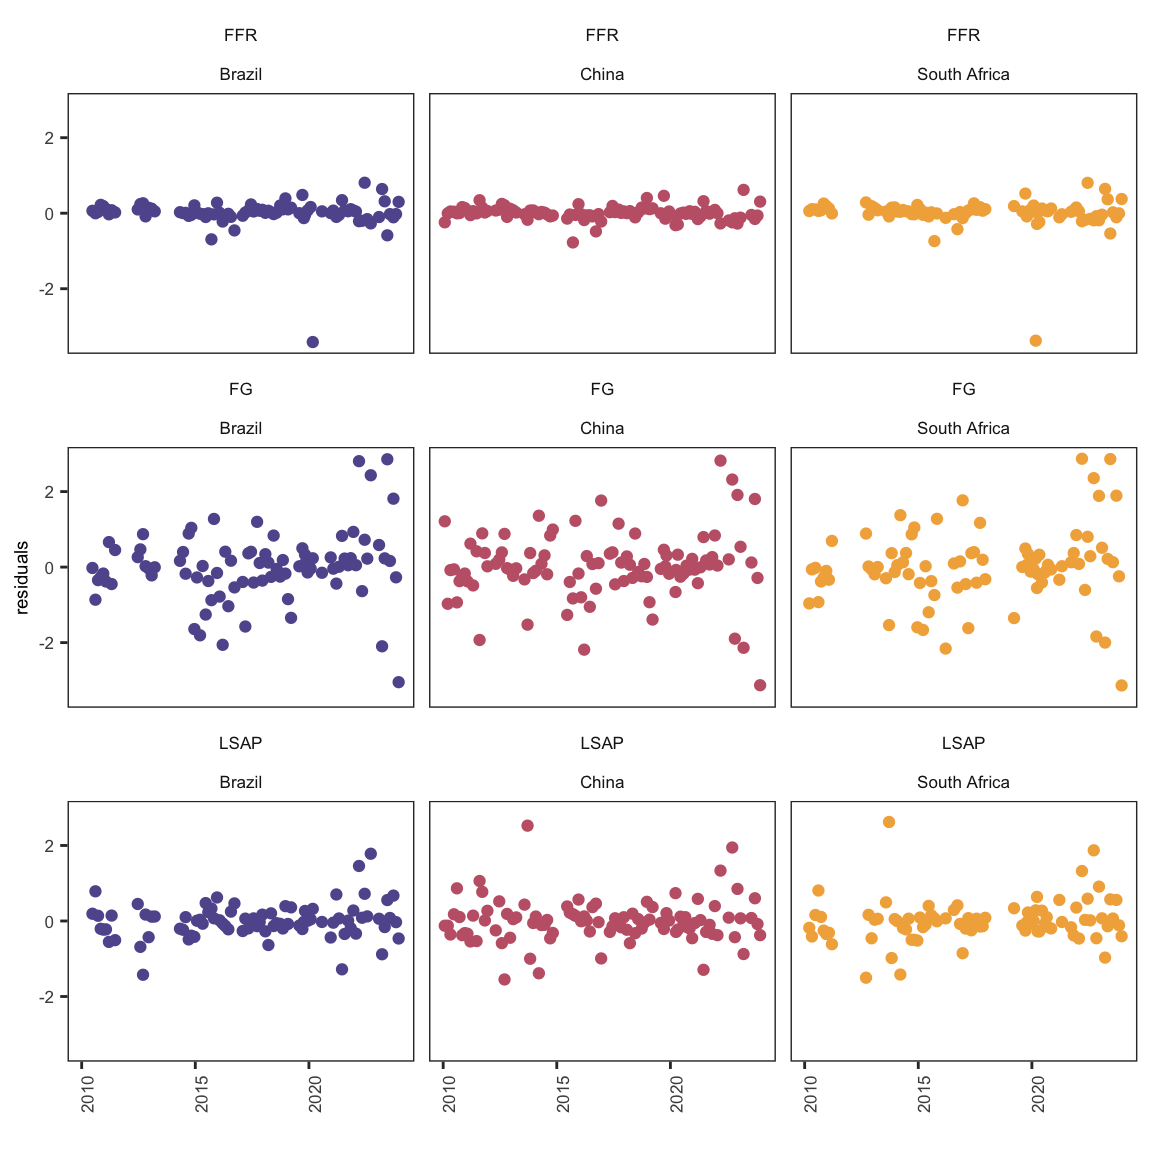

In [ ]:
#| label: fig-chart
#| fig-cap: "chart"
#| fig-align: center
#| fig-width: 6
#| fig-height: 6

ols_residuals_tbl <- bind_rows(
  sa_residuals_tbl,
  brazil_residulas_tbl,
  china_residulas_tbl
)

ols_residuals_gg <- 
  ols_residuals_tbl |> 
  # plot
  ggplot(aes(x = Date, y = residuals, colour = group)) +
  geom_point() +
  facet_wrap(variable ~ group) +
  theme_bw() +
  theme(
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  theme(
    text = element_text(size = 8),
    strip.background = element_rect(colour = "white", fill = "white"),
    axis.text.x = element_text(angle = 90),
    axis.title = element_text(size = 7),
    plot.tag = element_text(size = 8)
  ) +
  labs(x = "", y = "residuals") +
  scale_color_manual(values = pnw_palette("Sunset2", 3))

ols_residuals_gg

Export:

In [ ]:
artifacts_announcement_days_ols <- list(
  ols_models_tbl = ols_models_tbl,
  ols_residuals_gg = ols_residuals_gg,
  ols_residuals_tbl = ols_residuals_tbl
)

write_rds(artifacts_announcement_days_ols, 
          file = here("notebooks", "outputs", "artifacts_announcement_days_ols.rds"))